In [17]:
import pandas as pd

df = pd.read_csv('C://Users//and_c//Desktop//sparta_ga4//train_df3.csv', low_memory = False)

In [18]:
# 해당 값 전체 보기
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_columns = None

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   fullVisitorId              903653 non-null  object 
 1   channelGrouping            903653 non-null  object 
 2   visitStartTime             903653 non-null  int64  
 3   device_browser             903653 non-null  object 
 4   device_operatingSystem     903653 non-null  object 
 5   device_deviceCategory      903653 non-null  object 
 6   geoNetwork_continent       903653 non-null  object 
 7   geoNetwork_subContinent    903653 non-null  object 
 8   geoNetwork_country         903653 non-null  object 
 9   totals_visits              903653 non-null  int64  
 10  totals_hits                903653 non-null  int64  
 11  totals_bounces             903653 non-null  float64
 12  totals_newVisits           903653 non-null  float64
 13  totals_transactionRevenue  90

In [20]:
# 데이터프레임에 한 열의 값을 바꾸기 위해서 def함수를 만들고 apply 적용
import pandas as pd
import datetime #날짜와 시간을 다루는 라이브러리
import pytz #다양한 시간대를 처리하기 위해 사용하는 라이브러리

# Posix 시간을 utc 시간으로 변환하는 함수
def posix_to_utc(visitStartTime):
    utc_time = datetime.datetime.utcfromtimestamp(visitStartTime)
    return utc_time

# Posix 시간을 UTC 지정한 로컬 시간대로 변환하는 함수
def posix_to_utc_local(visitStartTime):
    utc_time = datetime.datetime.utcfromtimestamp(visitStartTime) #posix -> utc시간대로
    local_timezone = pytz.timezone('America/New_York')  # 지역 시간대
    return utc_time.astimezone(local_timezone) # 그 지역 시간대로 변환

In [21]:
df['visitStartTime'] = df['visitStartTime'].apply(posix_to_utc)

DAU / WAU / MAU를 Line Char로 시각화

In [22]:
import matplotlib.pyplot as plt

In [23]:
df['year'] = df['visitStartTime'].dt.year

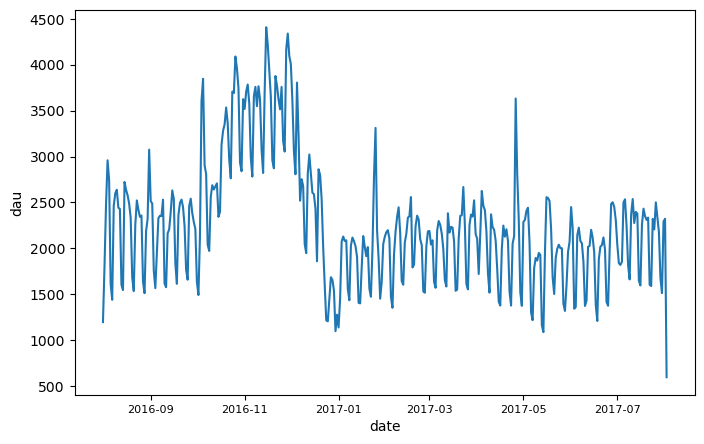

In [30]:
# DAU구하기
dau_df = df.groupby(df['visitStartTime'].dt.date)[['fullVisitorId']].nunique()

plt.figure(figsize = (8,5))
plt.plot(dau_df.index, dau_df['fullVisitorId'])
plt.xlabel('date')
plt.ylabel('dau')
plt.xticks(fontsize=8)
plt.show()

C:\Users\and_c\AppData\Local\Temp\ipykernel_14448\1717386953.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  wau_df = df.groupby(df['visitStartTime'].dt.week)[['fullVisitorId']].nunique()


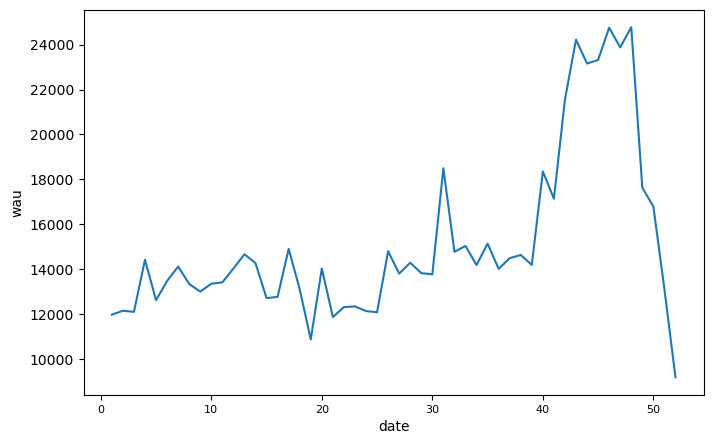

In [31]:
# WAU구하기
wau_df = df.groupby(df['visitStartTime'].dt.week)[['fullVisitorId']].nunique()

plt.figure(figsize = (8,5))
plt.plot(wau_df.index, wau_df['fullVisitorId'])
plt.xlabel('date')
plt.ylabel('wau')
plt.xticks(fontsize=8)
plt.show()

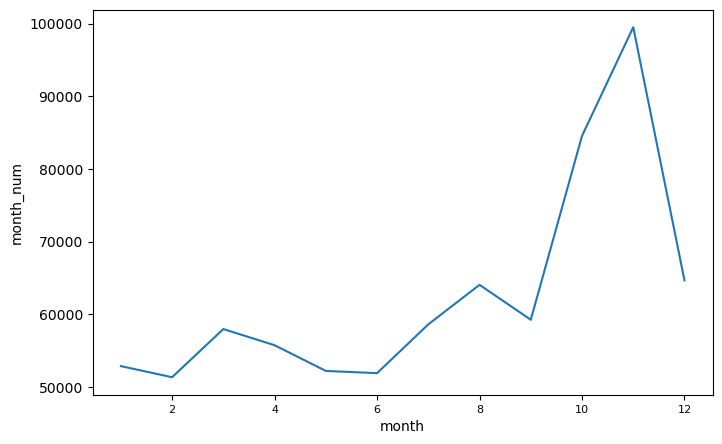

In [32]:
# 월을 기준으로 계산
month_df = df.groupby(df['visitStartTime'].dt.month)[['fullVisitorId']].nunique()

plt.figure(figsize = (8,5))
plt.plot(month_df.index, month_df['fullVisitorId'])
plt.xlabel('month')
plt.ylabel('month_num')
plt.xticks(fontsize=8)
plt.show()

- 10~12월에 접속량 증가

유저별 평균접속시간 분포 ECDF로 시각화

방문 주차에 따른 코호트를 생성하고, 코호트 별로 weekly 리텐션을 구하고 이를 heatmap으로 시각화

In [ ]:
# month 칼럼 만들기
df['week'] = df['visitStartTime'].dt.week

Carrying Capapcity